# Project IA - 2024

- Miguel Lima up202108659
- Pedro Paixão up202008467
- Pedro Romão up202108660 


## Introduction

### The Dataset

The dataset used in this project is in the following site [Drug Consumption Dataset](https://www.kaggle.com/datasets/mexwell/drug-consumption-classification).

The dataset contains 1886 instances and 32 attributes. 

The dataset is composed of 32 attributes, 12 of them are numerical and the rest are strings. The attributes are:

-   **ID**: ID of the instance.
-   **Age**: Age of the participant.
-   **Gender**: Gender of the participant.
-   **Education**: Level of education of the participant. 
-   **Country**: Country of current residence of the participant.
-   **Ethnicity**: Ethnicity of the participant.
-   **Nscore**: Nscore is NEO-FFI-R Neuroticism. Neuroticism is one of the Big Five higher-order personality traits in the study of psychology. Individuals who score high on neuroticism are more likely than average to be moody and to experience such feelings as anxiety, worry, fear, anger, frustration, envy, jealousy, guilt, depressed mood, and loneliness. 
-   **EScore**: Escore is NEO-FFI-R Extraversion. Extraversion is one of the five personality traits of the Big Five personality theory. It indicates how outgoing and social a person is. A person who scores high in extraversion on a personality test is the life of the party. They enjoy being with people, participating in social gatherings, and are full of energy.
-   **Oscore**: Oscore is NEO-FFI-R Openness to experience. Openness is one of the five personality traits of the Big Five personality theory. It indicates how open-minded a person is. A person with a high level of openness to experience in a personality test enjoys trying new things. They are imaginative, curious, and open-minded. Individuals who are low in openness to experience would rather not try new things. They are close-minded, literal and enjoy having a routine.
-   **Ascore**: Ascore is NEO-FFI-R Agreeableness. Agreeableness is one of the five personality traits of the Big Five personality theory. A person with a high level of agreeableness in a personality test is usually warm, friendly, and tactful. They generally have an optimistic view of human nature and get along well with others.
-   **Cscore**: Cscore is NEO-FFI-R Conscientiousness. Conscientiousness is one of the five personality traits of the Big Five personality theory. A person scoring high in conscientiousness usually has a high level of self-discipline. These individuals prefer to follow a plan, rather than act spontaneously. Their methodic planning and perseverance usually makes them highly successful in their chosen occupation.
-   **Impulsive**: Impulsive is impulsiveness measured by BIS-11. In psychology, impulsivity (or impulsiveness) is a tendency to act on a whim, displaying behavior characterized by little or no forethought, reflection, or consideration of the consequences. If you describe someone as impulsive, you mean that they do things suddenly without thinking about them carefully first.
-   **Sensation**: SS is sensation seeing measured by ImpSS. Sensation is input about the physical world obtained by our sensory receptors, and perception is the process by which the brain selects, organizes, and interprets these sensations. In other words, senses are the physiological basis of perception.
-   **Alcohol**: Consumption rate of alcohol by the participant.
-   **Amphet**: Consumption rate of amphet by the participant.
-   **Amyl**: Consumption rate of amyl by the participant.
-   **Benzos**: Consumption rate of benzos by the participant.
-   **Caff**: Consumption rate of caff by the participant.
-   **Cannabis**: Consumption rate of cannabis by the participant.
-   **Choc**: Consumption rate of choc by the participant.
-   **Coke**: Consumption rate of coke by the participant.
-   **Crack**: Consumption rate of crack by the participant.
-   **Ecstasy**: Consumption rate of ecstasy by the participant.
-   **Heroin**: Consumption rate of heroin by the participant.
-   **Ketamine**: Consumption rate of ketamine by the participant.
-   **Legalh**: Consumption rate of legalh by the participant.
-   **LSD**: Consumption rate of lsd by the participant.
-   **Meth**: Consumption rate of meth by the participant.
-   **Mushroom**: Consumption rate of mushroom by the participant.
-   **Nicotine**: Consumption rate of nicotine by the participant.
-   **Semer**: Consumption rate of semer by the participant.
-   **VSA**: Consumption rate of vsa by the participant.

Notes on the Dataset:
-   The attributes Age, Gender, Education, Country, Ethnicity, Nscore, Escore, Oscore, Ascore, Cscore, Impulsive, SS are represented in the Dataset by a numerical value which the Dataset provider mapped from the real meaning of the attributes.
That conversion, made by the Dataset owner can be consulted in [Conversion of the Dataset](https://www.kaggle.com/code/mexwell/starter-notebook-convert-column-values).

-   The substances Consumption rate is represented in a scale from CL0 to CL6.

    ```
    'CL0': 'Never Used'
    'CL1': 'Used over a Decade Ago'
    'CL2': 'Used in Last Decade'
    'CL3': 'Used in Last Year'
    'CL4': 'Used in Last Month'
    'CL5': 'Used in Last Week'
    'CL6': 'Used in Last Day'
    ```



### The problem

The goal of this project is to predict the Nicotine consumption rate of an individual based on 30 attributes: psicological, cultural, physical caracteristics and the individual's consumption rate of other substances.


### Solution

The solution to this problem is a supervised learning model, which will be trained using the dataset mentioned above. The model will be trained using the training set, and then evaluated using the test set. The model will be evaluated using the accuracy metric, precision, recall and F1 measure as well as other evaluation metrics learned in class.

## The Approach

#### Importing Libraries

First of all, we need to install and import some libraries which will help us in this project.

To install them, please run this command in the terminal (make sure you are in the project root directory)

pip install -r libraries.txt

Now we can import them and use them in the project.

In [165]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import math
import time
import warnings
warnings.filterwarnings('ignore')  #Used to ignore warnings

#### Create a dataframe with the drug_consumption.csv dataset

In [166]:
df = pd.read_csv("drug_consumption.csv")

df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


### Data Preprocessing

#### Dataset analysis

This step should be done before any data manipulation, as it is particularly important for us to gain a better understanding of the data and to filter out any outliers.

In [167]:
df.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [168]:
# Check missing values
df.isna().any()

ID           False
Age          False
Gender       False
Education    False
Country      False
Ethnicity    False
Nscore       False
Escore       False
Oscore       False
Ascore       False
Cscore       False
Impulsive    False
SS           False
Alcohol      False
Amphet       False
Amyl         False
Benzos       False
Caff         False
Cannabis     False
Choc         False
Coke         False
Crack        False
Ecstasy      False
Heroin       False
Ketamine     False
Legalh       False
LSD          False
Meth         False
Mushrooms    False
Nicotine     False
Semer        False
VSA          False
dtype: bool

In [169]:
# Check duplicated values
df.duplicated().any()

False

#### Cleaning the data and Filtering outliers

From this first analysis, we found that there are no missing values or duplicated values, so we dont need to drop or replace existing data. But we also noticed that there is a column ```ID``` which is not useful for our analysis, so we can drop it. The remaining values were consistent and exhibited a similar magnitude, being aligned with the specifications given by the the dataset provider.

In [170]:
# dropping column ID
df = df.drop(["ID"],axis = 'columns')

df.shape

(1885, 31)

### Enconding and Identification of the target variable

As stated before, the drug consumption rate is mesured between ```CL0``` and ```CL6```.
Being:
```
CL0 - Never Used
CL1 - Used over a Decade Ago
CL2 - Used in Last Decade
CL3 - Used in Last Year
CL4 - Used in Last Month
CL5 - Used in Last Week
CL6 - Used in Last Day
```

As the values of the substances' comsumption rate are not in numerical values, we need to encode them so we can use them in our models. 

For simplification we divided it in 2 categories. 

Being:

-   ```0``` : ```Last used one year or more ago```
-   ```1``` : ```Used in the last year```


In [171]:
usage_col = {
    'CL0': 0,
    'CL1': 1,
    'CL2': 2,
    'CL3': 3,
    'CL4': 4,
    'CL5': 5,
    'CL6': 6
    }

columns = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

for col in columns:
  df[col] = df[col].replace(usage_col)




def replace_s(value):
  if value <= 2:
    return 0
  else:
    return 1
  

for col in columns:
  if col == 'Nicotine':
    df[col] = df[col].apply(replace_s)



df.describe()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,...,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,...,1.314058,0.374005,0.569231,1.355968,1.061538,0.826525,1.187268,0.562334,0.009549,0.433422
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,...,1.647567,1.034779,1.220015,1.789647,1.491103,1.646632,1.466341,0.496231,0.159331,0.962375
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,...,3.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,1.000000,0.000000,0.000000
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000,4.000000,6.000000


### Data Analysis

We can now analyze the data, to get a better understanding of it. We will compare how the different features are distributed, based on the two Nicotine consumption categories.

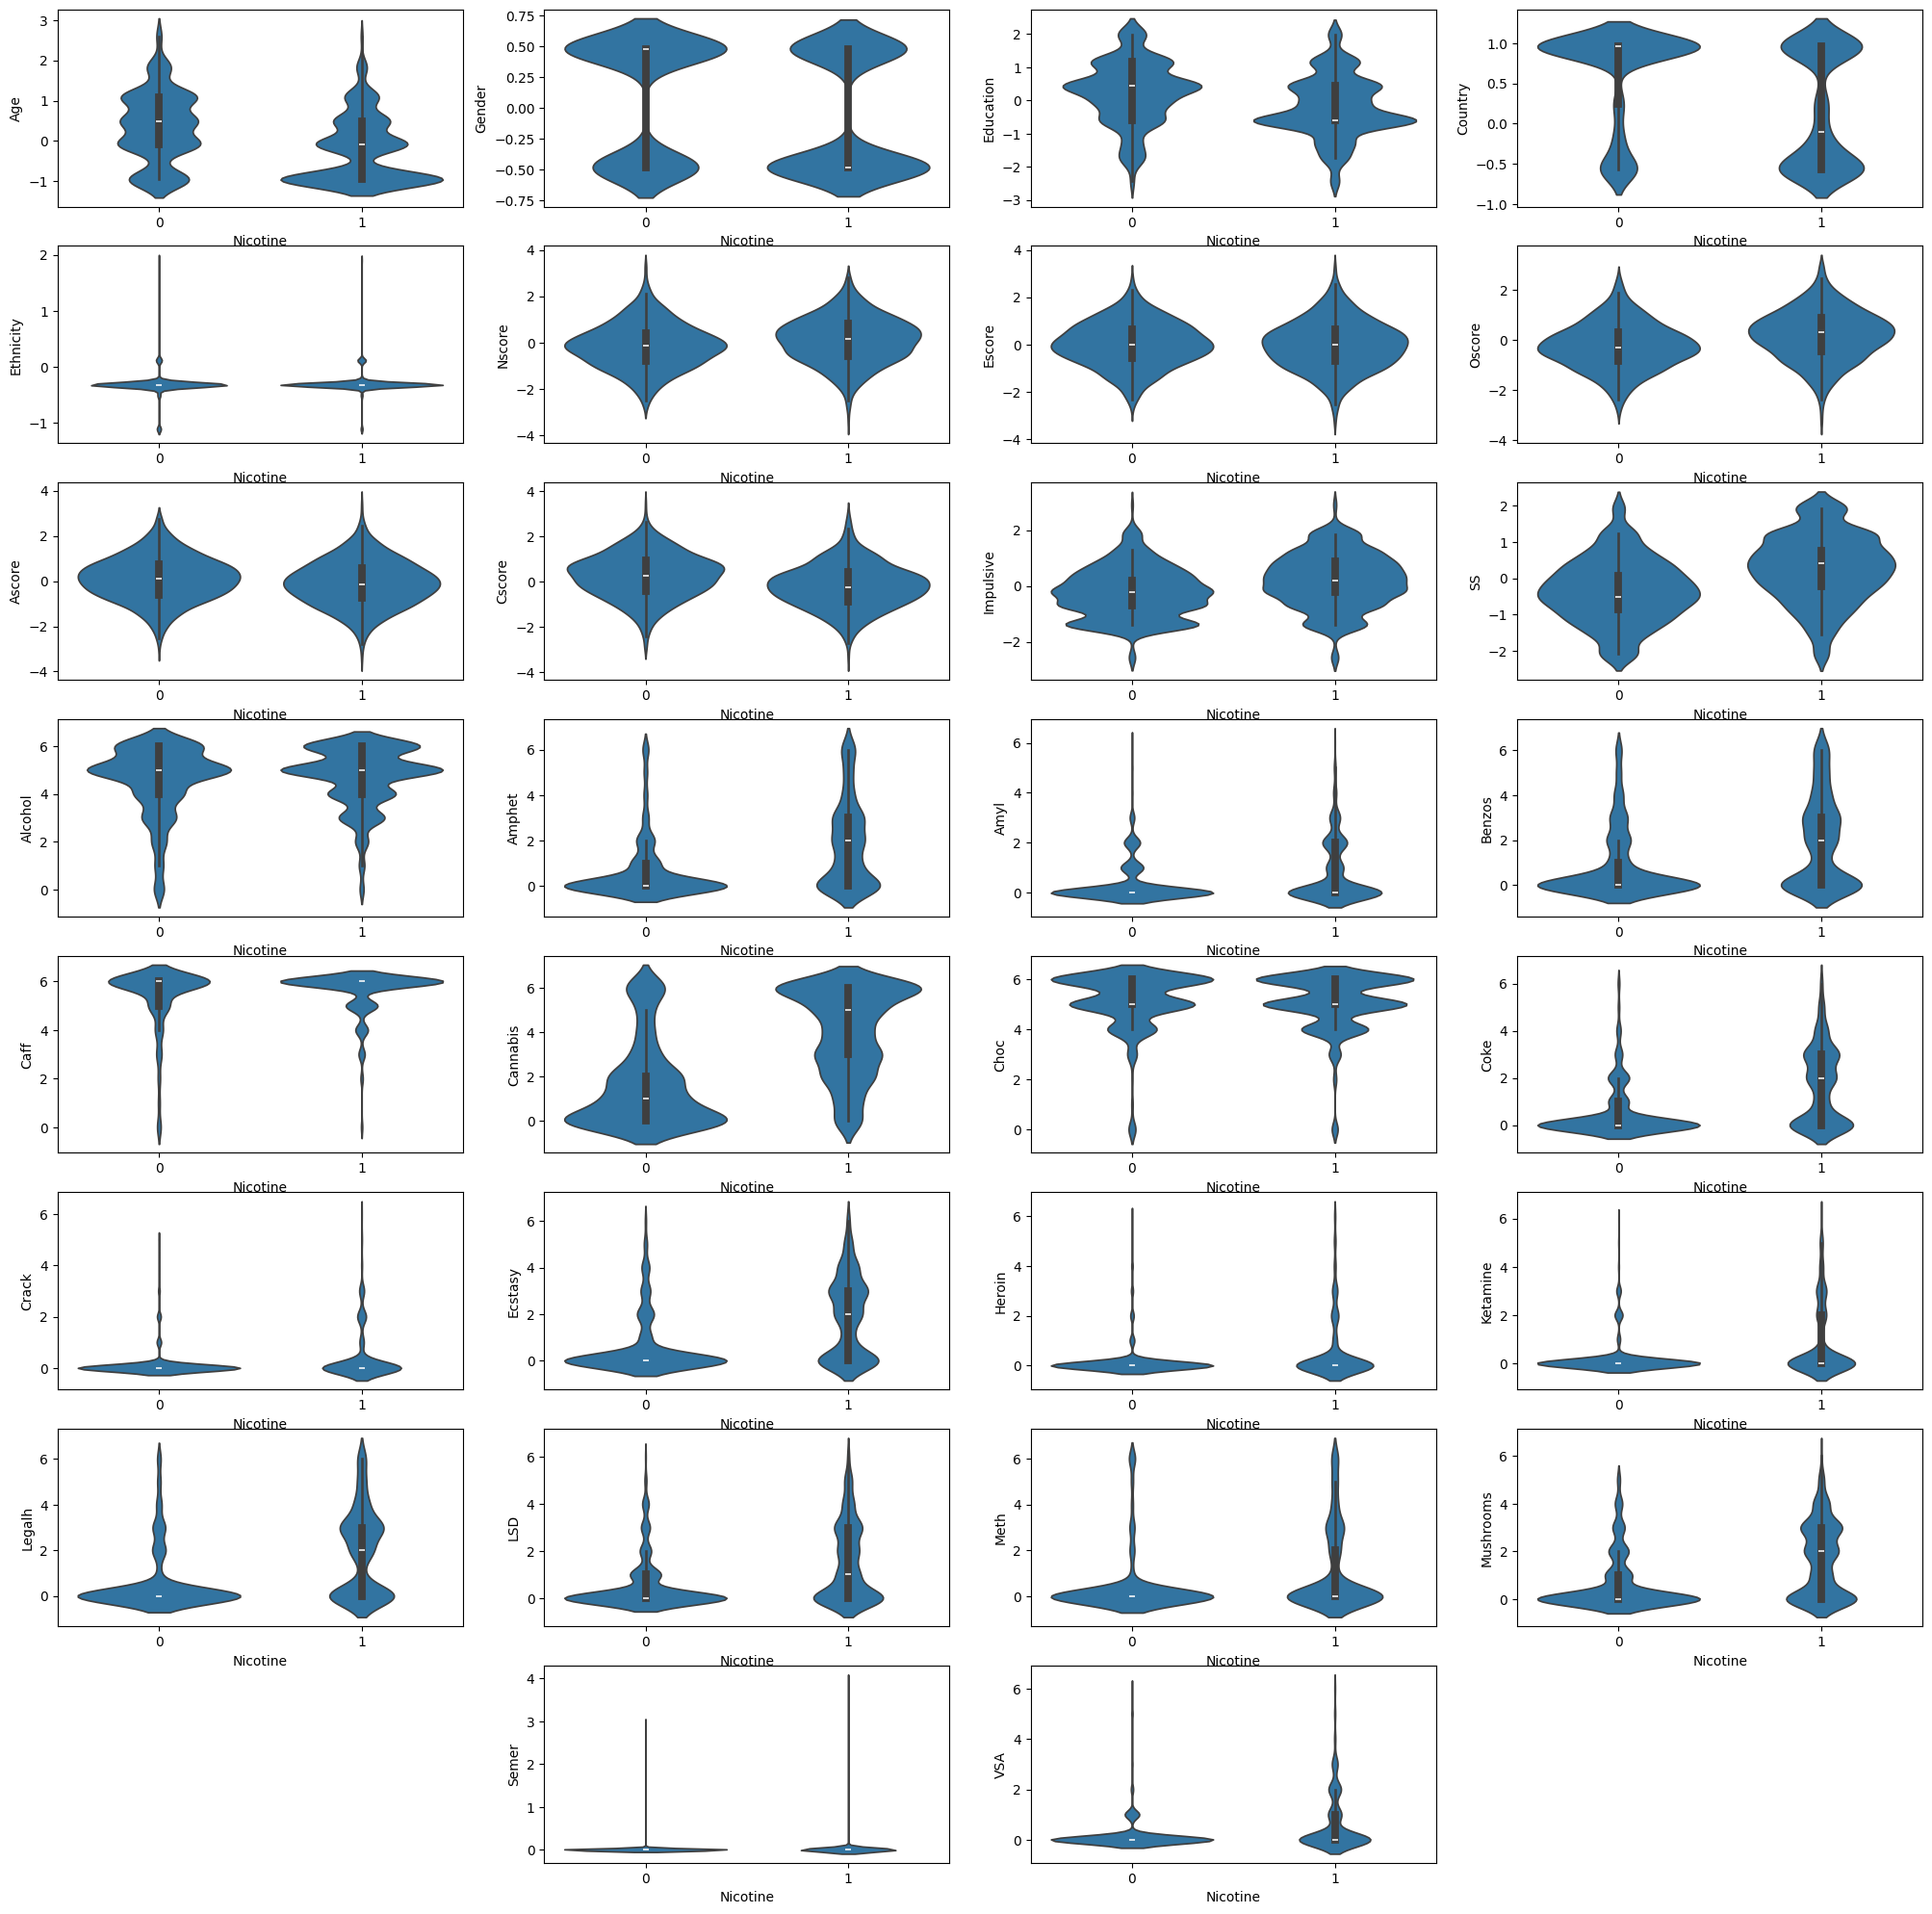

In [172]:

plt.figure(figsize=(25,25))
for column_index, column in enumerate(df.columns):
    if column == 'Nicotine':
        continue
    plt.subplot(8, 4, column_index + 1)
    sb.violinplot(x='Nicotine', y=column, data=df)

We can also analyse the correlation matrix, to see how the features are correlated with the Nicotine consumption.

<Axes: >

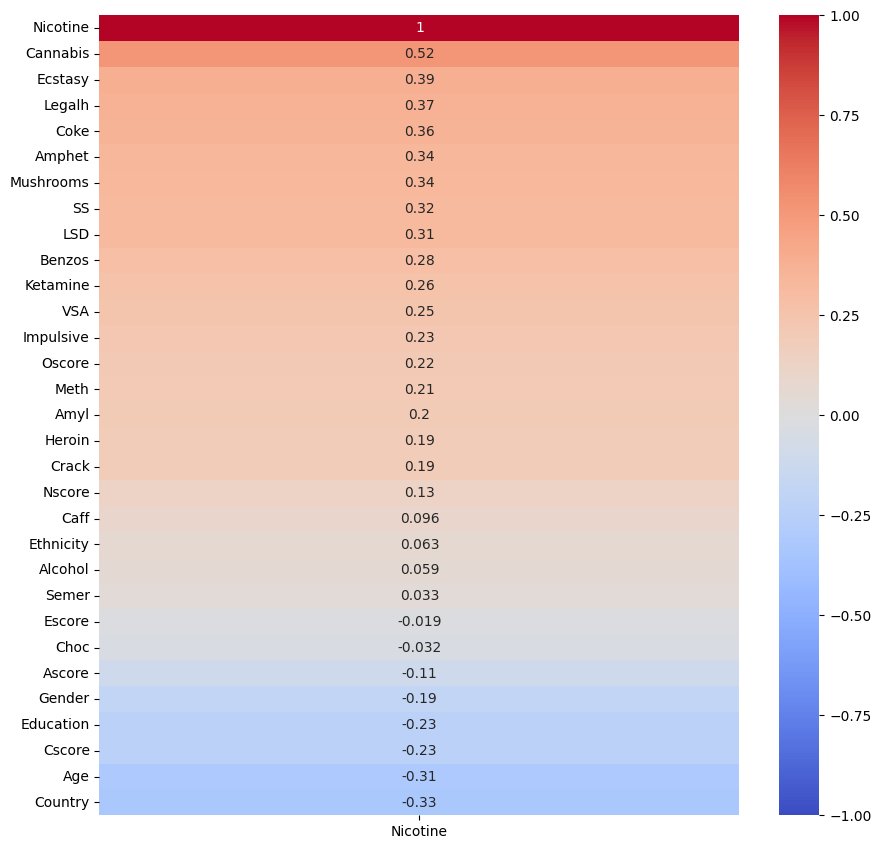

In [173]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

corr = df.corr()[['Nicotine']].sort_values(by='Nicotine', ascending=False)
sb.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

From this analysis, we conclude that there arent many features correlated with the Nicotine consumption. This could be a problem, impacting the performance of our model.

We also conclude that the consumption of other susbstances are more correlated with the Nicotine consumption than the actual cultural, physical and psicological caracteristics of an individual. Being the caracteristic Impulsiveness, the psicological caracteristic most correlated with Nicotine consumption despite its value being not that high. And the sensorial SS caracteristic being the most correlated physical caracteristic, also being not that high.

### Prepare the dataframe for model training

In [174]:
features = df.drop(['Nicotine'],axis=1) #inputs
labels = df['Nicotine'] #labels

# Subset of inputs
features[:5]



,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Semer,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,0,0,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,4,0,2,0,2,3,0,0,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,1,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,0,2,0,0,0,0,0,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,1,0,0,1,0,0,2,0,0


#### Split Dataset into training and testing sets 

In [175]:
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(features, labels, test_size=0.2, random_state=1)


#### Train the Model

In [176]:
# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=0),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Extra Trees': ExtraTreesClassifier(random_state=0),
    'SVM': SVC(random_state=0),
    'Neural Network': MLPClassifier(random_state=0),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=0),
    'Naive Bayes': GaussianNB()
}

# Initialize lists to store performance metrics
metrics = {
    'Classifier': [],
    'Precision': [],
    'Recall': [],
    'Accuracy': [],
    'F1 Score': [],
    'Training Time': []
}


# Iterate over each classifier
for name, classifier in classifiers.items():
    # Train the classifier on the training set
    start_time = time.time()
    classifier.fit(training_inputs, training_classes)
    training_time = time.time() - start_time
    
    # Predict labels for the testing set
    predicted_classes = classifier.predict(testing_inputs)
    
    # Calculate precision, recall, accuracy, and F1 score
    precision = precision_score(testing_classes, predicted_classes)
    recall = recall_score(testing_classes, predicted_classes)
    accuracy = accuracy_score(testing_classes, predicted_classes)
    f1 = f1_score(testing_classes, predicted_classes)
    
    # Store the performance metrics
    metrics['Classifier'].append(name)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['Accuracy'].append(accuracy)
    metrics['F1 Score'].append(f1)
    metrics['Training Time'].append(training_time)

# Create a DataFrame from the metrics dictionary
dfMetrics = pd.DataFrame(metrics)

# Set 'Classifier' column as index
dfMetrics.set_index('Classifier', inplace=True)

# Display the DataFrame
print(dfMetrics)


                     Precision    Recall  Accuracy  F1 Score  Training Time
Classifier                                                                 
Logistic Regression   0.777778  0.803828  0.763926  0.790588       0.028445
Decision Tree         0.716895  0.751196  0.697613  0.733645       0.008405
Extra Trees           0.758621  0.842105  0.763926  0.798186       0.147902
SVM                   0.758772  0.827751  0.758621  0.791762       0.040491
Neural Network        0.733032  0.775120  0.718833  0.753488       1.311188
K-Nearest Neighbors   0.731132  0.741627  0.705570  0.736342       0.000000
Random Forest         0.755459  0.827751  0.755968  0.789954       0.174182
Naive Bayes           0.775862  0.645933  0.700265  0.704961       0.000000


Here are some evaluation metrics for the diferent algoritms, allowing us to compare them on how they perform on that train and test set.

Although this metrics anable us to compare the algoritms performance on that train and test set, the performance can vary if the train and test sets are diferent. To avoid overfitting (when the model is learning to classify the training set so well that it doesn't generalize and perform well on data it hasn't seen before), we should employ 10-fold cross-validation on our models.


Also to avoid having an unbalanced proportion of the number of Nicotine consumers in the last year and the number of Nicotine consumers that last consumed prior to last year we will use Stratified 10-fold cross-validation keeping the class proportions similar across the folds.

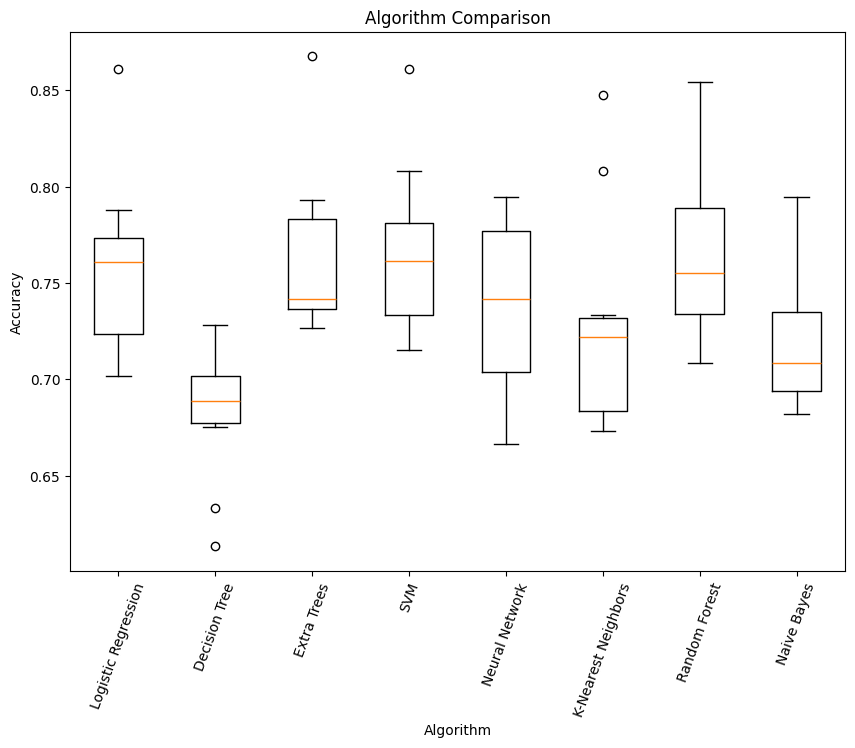

In [177]:
def compare_models():
    models = []
    models.append(('Logistic Regression', LogisticRegression()))
    models.append(('Decision Tree', DecisionTreeClassifier()))
    models.append(('Extra Trees', ExtraTreesClassifier()))
    models.append(('SVM', SVC()))
    models.append(('Neural Network', MLPClassifier()))
    models.append(('K-Nearest Neighbors', KNeighborsClassifier()))
    models.append(('Random Forest', RandomForestClassifier()))
    models.append(('Naive Bayes', GaussianNB()))

    
    results = []
    names = []
    scoring = 'accuracy'
    
    stratified_kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

    for name, model in models:
        cv_results = cross_val_score(model, training_inputs, training_classes, cv=stratified_kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        
    plt.figure(figsize=(10,7))
    plt.boxplot(results, labels=names)
    plt.title('Algorithm Comparison')
    plt.xlabel('Algorithm')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=70)
    plt.show()

compare_models()

### Selecting the best model

From the previous algoritm comparison, we conclude that the random forest is the best model since it has higher accuracy.

#### Finding the best parameters

In [178]:
random_forest_classifier = RandomForestClassifier()

parameter_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
}

grid_search = GridSearchCV(random_forest_classifier, parameter_grid)

grid_search.fit(training_inputs, training_classes)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.7751908648874613
Best parameters: {'bootstrap': True, 'max_depth': None, 'n_estimators': 300}


Now we can select the parameters for our model for better accuracy.

Lets train the model with those parameters and plot the confusion matrix.

In [179]:
model = RandomForestClassifier(bootstrap=grid_search.best_params_['bootstrap'],max_depth=grid_search.best_params_['max_depth'],n_estimators=grid_search.best_params_['n_estimators'])
model.fit(training_inputs, training_classes)

RandomForestClassifier(n_estimators=300)

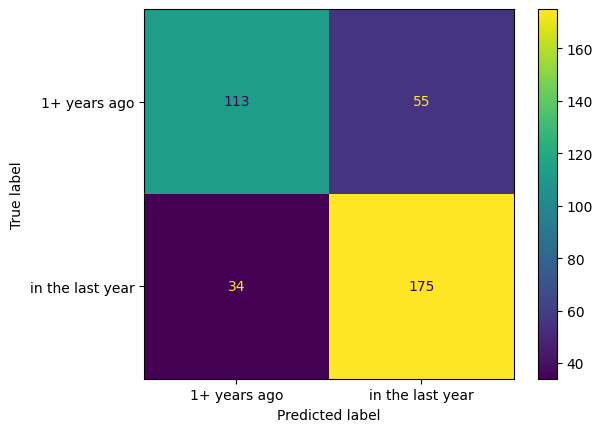

In [180]:
y_predicted = model.predict(testing_inputs)
confusion_matrix_res = confusion_matrix(testing_classes, y_predicted)

ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_res, display_labels = ["1+ years ago", "in the last year",]).plot()
plt.show()